# Part 4 Exploratory Analysis--continue

In this notebook we added more features such as restaurant,schools and supermarkets to our data using arcgis package.
With these new feature, we can have more options to build the model for buyying preference later.

* Collected the number of restaurants, schools, hospitals, gas_stations, parks, supermarkets near each houes within **5 miles** 
* 78613 area is overall the best area since all the facilities are high. It implies why it is the most expensive area  among all 4 regions.
* People who like parks would prefer 78664 area

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 30)

from arcgis.gis import GIS
from arcgis.geocoding import geocode
from arcgis.features import SpatialDataFrame
from arcgis.geometry.functions import buffer
gis = GIS()

In [376]:
df=pd.read_csv("df_visual.csv")

In [377]:
df = pd.DataFrame.spatial.from_xy(df, 'longitude','latitude')

In [378]:
restaurants = []
schools = []
hospitals = []
gas_stations = []
parks = []
supermarkets = []

for i in df.name:

    df_geo = geocode(i, as_featureset=True).features[0]
    df_buffer = buffer([df_geo.geometry],in_sr = 102100, buffer_sr=102100,
                         distances=0.05, unit=1)[0]
    
    restaurant = geocode('restaurant', search_extent=df_buffer.extent,max_locations=30, as_featureset=True)
    restaurants.append(len(list(set([i.attributes['PlaceName'] for i in restaurant]))))


    
    school = geocode('school', search_extent=df_buffer.extent,max_locations=30, as_featureset=True)
    schools.append(len(list(set([i.attributes['PlaceName'] for i in school]))))


    
    hospital = geocode('hospital', search_extent=df_buffer.extent,max_locations=30, as_featureset=True)
    hospitals.append(len(list(set([i.attributes['PlaceName'] for i in hospital]))))


    
    gas_station = geocode('gas station', search_extent=df_buffer.extent,max_locations=30, as_featureset=True)
    gas_stations.append(len(list(set([i.attributes['PlaceName'] for i in gas_station]))))

    
    park = geocode('park', search_extent=df_buffer.extent,max_locations=30, as_featureset=True)
    parks.append(len(list(set([i.attributes['PlaceName'] for i in park]))))
    
    supermarket= geocode('supermarket', search_extent=df_buffer.extent,max_locations=30, as_featureset=True)
    supermarkets.append(len(list(set([i.attributes['PlaceName'] for i in supermarket]))))

In [380]:
df['restaurants'] = restaurants
df['schools']= schools
df['hospitals']= hospitals
df['gas_stations']= gas_stations
df['parks']=parks
df['supermarkets']=supermarkets

In [391]:
df.shape

(5308, 30)

In [392]:
df.head()

,beds,baths,sqft,solddate,soldprice,housetype,YearBuilt,Heating,Cooling,parking,name,streetAddress,addressLocality,addressRegion,postalCode,latitude,longitude,lotsize1,pricepersqft,date,day,month,year,SHAPE,restaurants,schools,hospitals,gas_stations,parks,supermarkets
0,3,2.0,1478,4/22/2019,224778,Single Family,2000,Other,Central,2,"702 Le Ann Ln, Cedar Park, TX 78613",702 Le Ann Ln,Cedar Park,TX,78613,30.518779,-97.817411,5662.0,152.082544,4/22/2019,22,4,2019,"{'x': -97.817411, 'y': 30.518779, 'spatialRefe...",30,30,2,14,9,16
1,4,2.5,2665,4/12/2019,250000,Single Family,2000,Forced air,Central,1,"2605 Byfield Dr, Cedar Park, TX 78613",2605 Byfield Dr,Cedar Park,TX,78613,30.540536,-97.845924,8276.0,93.808630,4/12/2019,12,4,2019,"{'x': -97.845924, 'y': 30.540536, 'spatialRefe...",30,29,2,15,2,10
2,3,3.0,2255,4/5/2019,269000,Single Family,2000,Forced air,Central,2,"1622 Abbey Ln, Cedar Park, TX 78613",1622 Abbey Ln,Cedar Park,TX,78613,30.522559,-97.854897,7666.0,119.290466,4/5/2019,5,4,2019,"{'x': -97.854897, 'y': 30.522559, 'spatialRefe...",30,30,2,16,5,12
3,3,2.0,1820,3/22/2019,252883,Single Family,2000,Forced air,Central,2,"1007 Cashew Ln, Cedar Park, TX 78613",1007 Cashew Ln,Cedar Park,TX,78613,30.507623,-97.804945,8624.0,138.946703,3/22/2019,22,3,2019,"{'x': -97.804945, 'y': 30.507623, 'spatialRefe...",30,30,2,14,13,18
4,5,5.0,3608,3/1/2019,450000,Single Family,2000,Other,Central,3,"1818 Cattle Dr, Cedar Park, TX 78613",1818 Cattle Dr,Cedar Park,TX,78613,30.487773,-97.846532,8887.0,124.722838,3/1/2019,1,3,2019,"{'x': -97.846532, 'y': 30.487773, 'spatialRefe...",29,30,2,13,13,13


In [395]:
area_prices=df.groupby(["postalCode"]).agg({
    "restaurants":np.mean,
    "schools":np.mean,
    "hospitals":np.mean,
    "gas_stations":np.mean,
    "parks":np.mean,
    "supermarkets":np.mean
})

In [398]:
area_prices.T

postalCode,78613,78641,78660,78664
restaurants,28.347500,25.773555,25.303318,28.551102
schools,29.793333,17.912025,22.138626,27.795591
hospitals,1.643333,1.205102,0.075237,0.609218
gas_stations,12.490833,10.379490,8.481043,10.398798
parks,8.951667,1.201458,6.273697,17.256513
supermarkets,11.775833,5.970328,8.414100,12.609218


(0, 30)

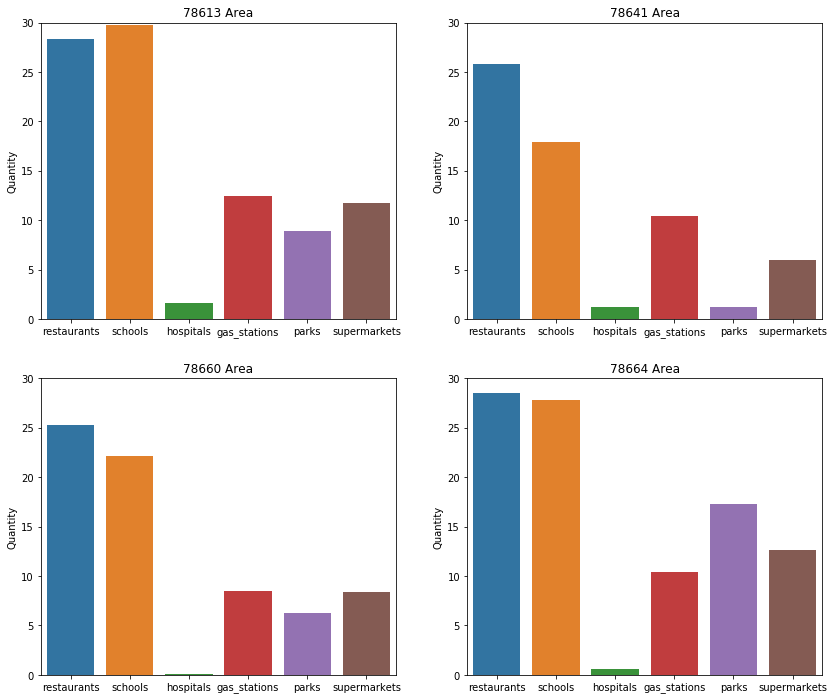

In [409]:
plt.figure(figsize=(14,12))

plt.subplot(2, 2, 1)
sns.barplot(area_prices.T.index,area_prices.T[78613].values)
plt.title('78613 Area')
plt.ylabel('Quantity')
plt.ylim((0,30))

plt.subplot(2, 2, 2)
sns.barplot(area_prices.T.index,area_prices.T[78641].values)
plt.title('78641 Area')
plt.ylabel('Quantity')
plt.ylim((0,30))

plt.subplot(2, 2, 3)
sns.barplot(area_prices.T.index,area_prices.T[78660].values)
plt.title('78660 Area')
plt.ylabel('Quantity')
plt.ylim((0,30))

plt.subplot(2, 2, 4)
sns.barplot(area_prices.T.index,area_prices.T[78664].values)
plt.title('78664 Area')
plt.ylabel('Quantity')
plt.ylim((0,30))


In [411]:
df.to_csv("df_visual_2.csv",index=False)